#### Assignment 6

"Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month

60% of the marks will be given for the above

For the last 40%

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

 You do not need to over comment your code. Marks will be given for how nice the plots are."

In [22]:
# We'll import our libraries
import pandas as pd
import matplotlib.pyplot as plt


#### Loading our Data
We'll load the data directly from the URL and skip the first 23 rows - they just contain details of the weather station and column headings.


In [23]:
# I'll load the data from the URL provided and skip the first 23 rows
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
data = pd.read_csv(url, skiprows=23, skipinitialspace=True, low_memory=False)


Once this was loaded, I got the following error:

`C:\Users\Administrator\AppData\Local\Temp\ipykernel_5048\2833354025.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, skiprows=23)`

The fact that there was metadata in the first few rows seemed to make it think that there were mixed data types in the columns. A visual inspection of the data confirmed that the data wasn't mixed after row 25, so I went back and added [low_memory=False](https://www.geeksforgeeks.org/pandas-read_csv-low_memory-and-dtype-options/) option above.

We want to skip the first 23 rows, so we use iloc for this and create a new dataframe called *knockweather*. We'll use the [pandas.DataFrame.head
](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [pandas.DataFrame.info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas-dataframe-info) methods to have a look at our data. 

In [24]:
# We want to ignore the first 23 rows so we use iloc to skip the first 23 rows
knockweather = data.iloc[23:]
# Let's display the first 5 rows of the our new DF
knockweather.head()




,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
23,01-aug-1996 06:00,0,0.0,0,10.2,0,9.2,8.1,10.8,87,...,2,8.0,2,250.0,2.0,11.0,0.0,30000.0,43.0,7.0
24,01-aug-1996 07:00,0,0.0,0,10.7,0,9.5,8.3,10.9,85,...,2,7.0,2,240.0,2.0,11.0,0.0,25000.0,45.0,7.0
25,01-aug-1996 08:00,0,0.0,0,10.6,0,9.7,8.8,11.3,89,...,2,11.0,2,250.0,2.0,11.0,0.0,30000.0,42.0,7.0
26,01-aug-1996 09:00,2,0.0,0,12.0,0,10.6,9.2,11.7,83,...,2,11.0,2,250.0,21.0,62.0,0.0,30000.0,40.0,7.0
27,01-aug-1996 10:00,0,0.0,0,12.7,0,10.8,8.9,11.4,78,...,2,13.0,2,260.0,2.0,11.0,0.0,35000.0,37.0,7.0


In [25]:
# Let's get info on our dataframe
knockweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246907 entries, 23 to 246929
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    246907 non-null  object 
 1   ind     246907 non-null  int64  
 2   rain    246858 non-null  float64
 3   ind.1   246907 non-null  int64  
 4   temp    246907 non-null  float64
 5   ind.2   246907 non-null  int64  
 6   wetb    246907 non-null  float64
 7   dewpt   246907 non-null  float64
 8   vappr   246907 non-null  float64
 9   rhum    246907 non-null  int64  
 10  msl     246889 non-null  float64
 11  ind.3   246907 non-null  int64  
 12  wdsp    246857 non-null  float64
 13  ind.4   246907 non-null  int64  
 14  wddir   246855 non-null  float64
 15  ww      192195 non-null  float64
 16  w       192194 non-null  float64
 17  sun     246907 non-null  float64
 18  vis     185100 non-null  float64
 19  clht    246889 non-null  float64
 20  clamt   246889 non-null  float64
dtypes: float6

We now want to check for missing values. Initially, the below output indicated that there were no missing values. The assignment question had indicated that there were missing values and a visual inspection confirmed this. Therefore I added `skipinitialspace=True`, to remove spaces that has been masking the hidden values and now we had a picture of where the missing values are. Date and temp show values of zero so we can proceed with our analysis.

In [26]:
knockweather.isna().sum()

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       54712
w        54713
sun          0
vis      61807
clht        18
clamt       18
dtype: int64

We see from the output of `knockweather.head()`that the date column in the dataframe contains strings formatted as dates (e.g. `01-aug-1996 06:00` ). We need to convert these dates to a datetime object before we plot it. I got errors when the first plot was generated - this was resolved by incorporting `format="%d-%b-%Y %H:%M",` into the code.

In [27]:
# We convert our date column to a datetime object 
knockweather.loc[:, 'date'] = pd.to_datetime(knockweather['date'], format="%d-%b-%Y %H:%M", errors='coerce')

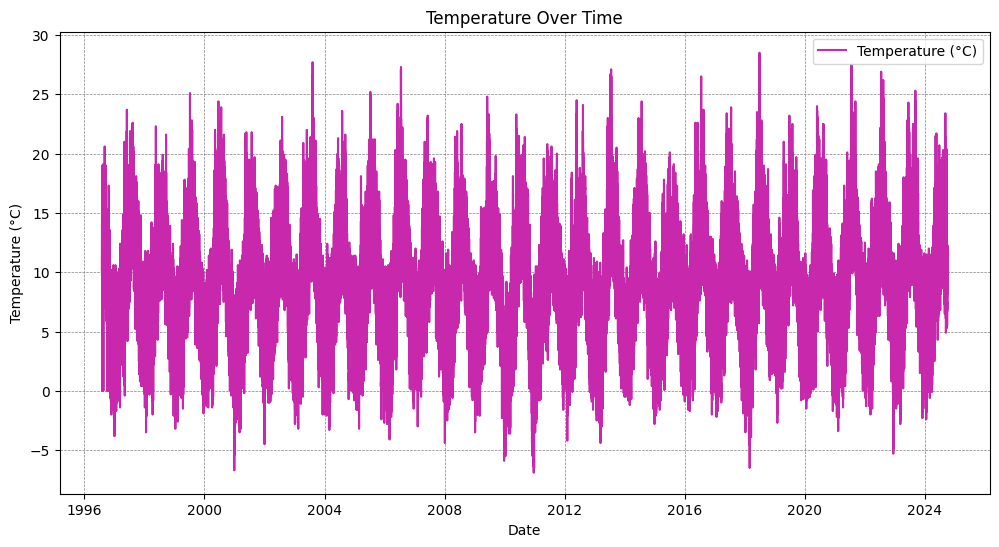

In [32]:


import matplotlib.pyplot as plt

# Now we can plot temperature over time
plt.figure(figsize=(12, 6))
plt.plot(knockweather['date'], knockweather['temp'], color='#c728ac', label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

